**VPC - TP N°2: detección de bordes en ángulo.**

En el presente TP se busca resolver un algoritmo que permita obtener los bordes de una imagen que se encuentren con un cierto ángulo. Luego, se procede a analizar una imagen de una grilla metálica y una imagen de una telaraña para comprobar su funcionalidad.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
####### Se incorporan las librerías necesarias.
import numpy as np
import cv2
import matplotlib.pyplot as plt
import copy
from google.colab.patches import cv2_imshow

In [3]:
####### Se define la función para cargar las imágenes, similar al TP1.
def carga_imagen(img):
    imagen = cv2.imread('/content/drive/MyDrive/CV I/Imágenes TPs/TP2/' + img)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    return imagen

In [13]:
######## Carga de imágenes.
img = carga_imagen('metalgrid.jpg')
img_telaraña = carga_imagen('tela2.jpg')

In [19]:
##### Rutina para cálculo de gradientes de la imagen
##### Se pasa la imagen por un filtro de escala de grises y luego por un Gaussiano de 5x5. Se aplica Sobel y luego funciones trigonométricas para sacar magnitud y ángulo de gradiente.
def gradientes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),0)
    sobelx_32 = cv2.Sobel(blur,cv2.CV_32F,1,0,ksize=3)
    absx_32 = np.absolute(sobelx_32)
    sobelx_8u1 = absx_32/absx_32.max()*255
    sobelx_8u = np.uint8(sobelx_8u1)

    sobely_32 = cv2.Sobel(blur,cv2.CV_32F,0,1,ksize=3)
    absy_32 = np.absolute(sobely_32)
    sobely_8u1 = absy_32/absy_32.max()*255
    sobely_8u = np.uint8(sobely_8u1)

    mag = np.hypot(sobelx_8u, sobely_8u)
    theta = np.arctan2(sobely_32, sobelx_32)
    angle = np.rad2deg(theta) 
    return mag, angle

In [16]:
####### La rutina de bordes utiliza los gradientes de la imagen para luego extraer aquellos en los que el ángulo corresponde con el ángulo deseado.
####### a su vez mediante la histerésis se filtran los gradientes de valores muy bajos.
####### Los umbrales, colores de bordes débiles/fuertes, ángulo y tolerancia en el ángulo quedan a gusto del consumidor de la función.
def bordes(img, angle, tolerancia, UmbralAlto, UmbralBajo, strong_color, weak_color):
    img2 = copy.copy(img)
    mag, angulo = gradientes(img)
    mag=np.array(mag)
    angulo=np.array(angulo)
    M,N = mag.shape
    aux = np.zeros((M,N), dtype= np.uint8)
    for i in range(1,M-1):
        for j in range(1,N-1):
            if (angle-tolerancia <= angulo[i][j] <= angle+tolerancia):
                aux[i][j]=mag[i][j]

    # los bordes seguros son los siguientes:
    strong_i, strong_j = np.where(aux >= UmbralAlto)
    # los siguientes bordes seguro no lo son:
    zeros_i, zeros_j = np.where(aux < UmbralBajo)
    # los bordes débiles son los siguientes:
    weak_i, weak_j = np.where((aux <= UmbralAlto) & (aux >= UmbralBajo))
    # Setear el mismo valor a todos los tipos de píxel. En el caso de los ceros, para conservar la imagen original, se le reduce su intensidad a un 10%.
    img2[strong_i, strong_j] = strong_color
    img2[zeros_i, zeros_j ] = img2[zeros_i, zeros_j]/10
    img2[weak_i, weak_j] = weak_color
    return img2

**Aquí comienza la sección de pruebas con ambas imágenes.**

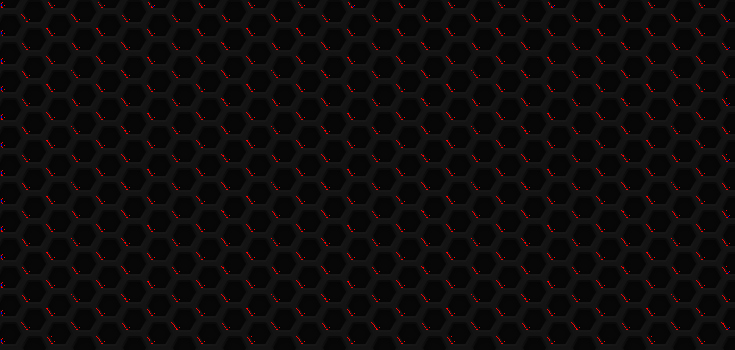

In [20]:
angulo=135
tolerancia=7
umbralalto=200
umbralbajo=50
strong_color=[255,0,0]
weak_color=[0,0,255]
img2=bordes(img, angulo, tolerancia, umbralalto, umbralbajo, strong_color, weak_color)
cv2_imshow(img2)

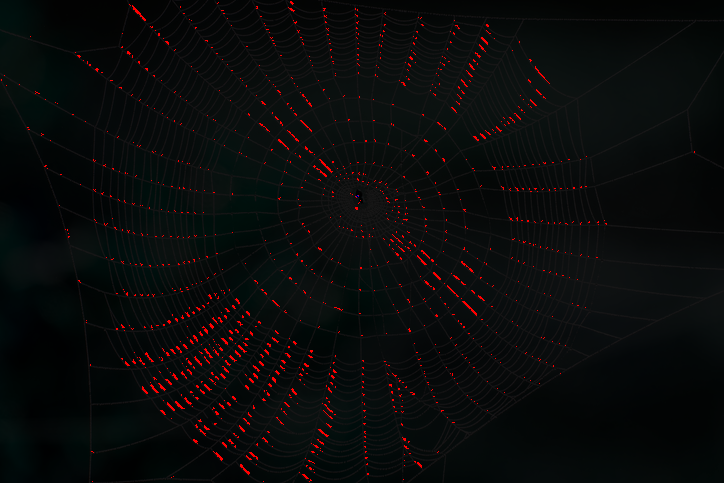

In [21]:
angulo=135
tolerancia=7
umbralalto=200
umbralbajo=50
strong_color=[255,0,0]
weak_color=[0,0,255]
img2=bordes(img_telaraña, angulo, tolerancia, umbralalto, umbralbajo, strong_color, weak_color)
cv2_imshow(img2)